<p style = "text-align: center; font-size:30px"><b> ML- ASSG 4</b></p>
<p style = "text-align : right; font-size: 18px"><b> Divyam Agrawal<br> 20103088 </b></p>

## Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, RocCurveDisplay,precision_recall_curve, PrecisionRecallDisplay

### Extracting Data

In [2]:
data = pd.read_excel('songs.xlsb', sheet_name='songs', engine='pyxlsb')

### Copying for further process

In [3]:
data_prep = data.copy()
(data['Top10'] == 1).sum()

1119

## Removing categorical/non important features

In [4]:
data_prep.drop(['songtitle', "artistID", "songID", "artistname"], axis =1, inplace=True)

In [5]:
# enc = preprocessing.OneHotEncoder()
# A = enc.fit_transform(data_prep[['artistname']])
# print(A.toarray())
# data_prep['artistname'] = A.toarray()
# # data_prep.drop(data_prep['artistname'], axis = 1, inplace = True)
# data_prep

# ct = ColumnTransformer([( "onrhot", OneHotEncoder(), ['artistname'])], remainder= 'passthrough')
# data_prep = ct.fit_transform(data_prep)

### Converting dataframe to numpy arrays

In [6]:
data_prep = data_prep.to_numpy()

In [7]:
print(data_prep.shape)

(7574, 35)


## Preparing train and test dataset
### In test we append rows in which year == 2010
### In train we append all the other rows

In [8]:
train = np.array([])
test = np.array([])

for i in data_prep:
    if i[0] == 2010.0:
        test = np.append(test, i)
    else:
        train = np.append(train , i)

### Reshaping dataset acccording to (no.of samples X no. of features)

In [9]:
train = train.reshape(7201, 35)
test = test.reshape(373, 35)


## Extracting features and targets for both train and test dataset

In [10]:
train_features = train[:, 0:-1]
train_target = train[:, -1]
test_features = test[:, 0:-1]
test_target = test[:, -1]

test_features.shape

(373, 34)

In [11]:
# train_features = Normalizer().fit_transform(train_features)
# test_features = Normalizer().fit_transform(test_features)

# Using Logistic Regression

## First we use uniform class weight classification
### we used solver = 'sag' as it gave best results out of all
### We can easily observe that a lot of false negatives are here

In [12]:
clf = LogisticRegression(solver= 'sag',max_iter = 50000).fit(train_features, train_target)
clf.score(test_features, test_target)

0.8632707774798928

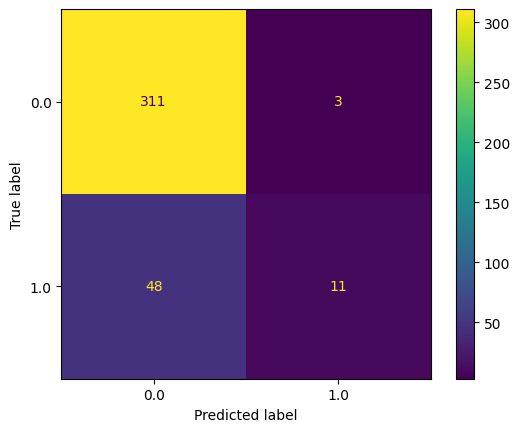

In [13]:
pred = clf.predict(test_features)
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Now using non uniform class weights
### I tried a lot of weights for class 1 but 5.4 seems to give best results

In [14]:
clf0 = LogisticRegression(random_state = 0, solver= 'sag',max_iter = 50000, class_weight = {0:1, 1:5.4})
clf0.fit(train_features, train_target)
clf0.score(test_features, test_target)

0.7479892761394102

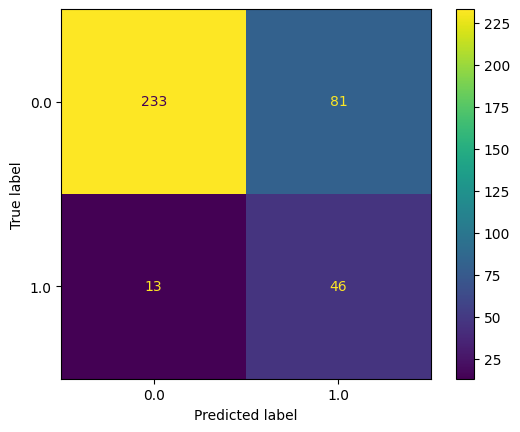

In [15]:
pred = clf0.predict(test_features)
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

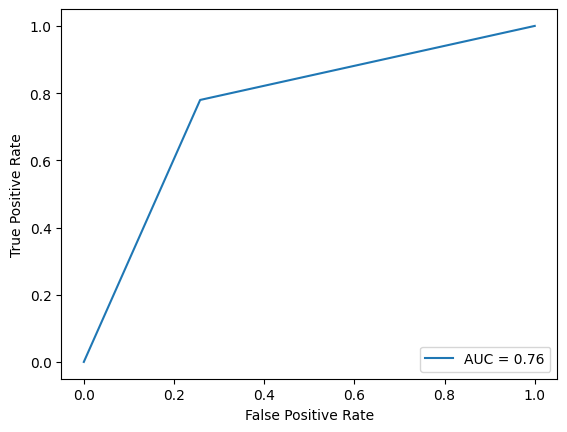

In [16]:
fpr, tpr, thresholds = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

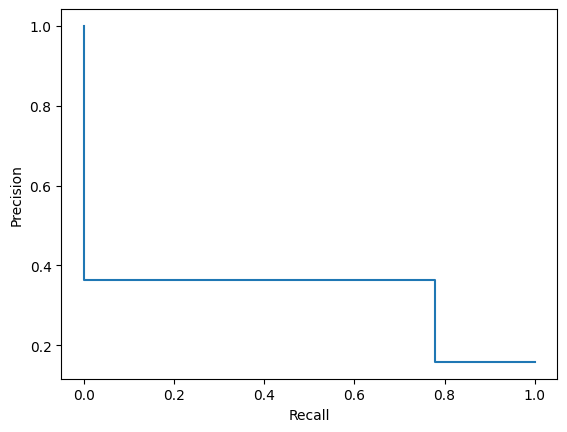

In [17]:
precision, recall, thresh_holds = precision_recall_curve(test_target, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

### In sklearn doc it was written that 'sag' runs guarantedly fast in scaled features, although convergence was achieved extremely fast, it reduced the models AUC under ROC 

In [18]:
train_features_norm = Normalizer().fit_transform(train_features)
test_features_norm = Normalizer().fit_transform(test_features)

In [19]:
clf0_1 = LogisticRegression(random_state = 0, solver= 'sag',max_iter = 50000, class_weight = {0:1, 1:5.5})
clf0_1.fit(train_features_norm, train_target)
clf0_1.score(test_features_norm, test_target)

0.7184986595174263

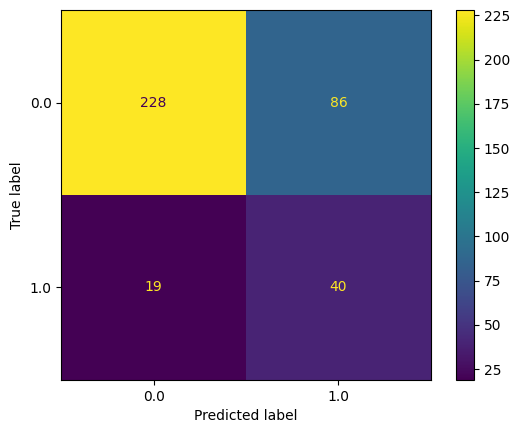

In [20]:
pred = clf0_1.predict(test_features_norm)
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

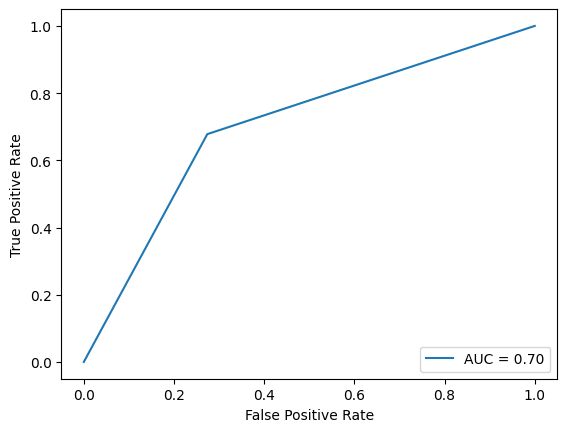

In [21]:
fpr, tpr, thresholds = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

# Using Ridge classification
## without class weights it also performs very bad(No TPs!!)

In [22]:
clf2 = RidgeClassifier(solver= 'sag',max_iter = 50000).fit(train_features, train_target)
clf2.score(test_features, test_target)

0.8418230563002681

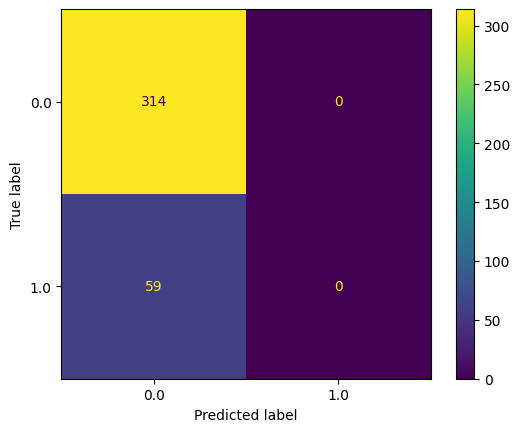

In [23]:
pred = clf2.predict(test_features)
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Now using class weights
### I tried a lot of weights but 6.3 gave best AUC under ROC
### This model increased TPs but also increased FPs
During traing it demanded normalised features , so provided!

In [24]:
train_features_norm = Normalizer().fit_transform(train_features)
test_features_norm = Normalizer().fit_transform(test_features)

In [25]:
clf2_0 = RidgeClassifier(solver= 'sag',max_iter = 50000, class_weight = {0:1, 1:6.3} )
clf2_0.fit(train_features_norm, train_target)
clf2_0.score(test_features_norm, test_target)

0.6729222520107239

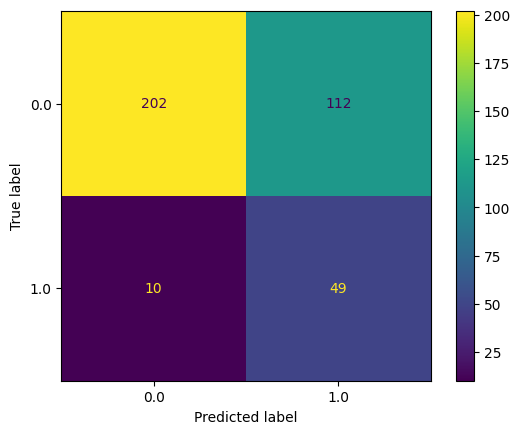

In [26]:
pred = clf2_0.predict(test_features_norm)
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

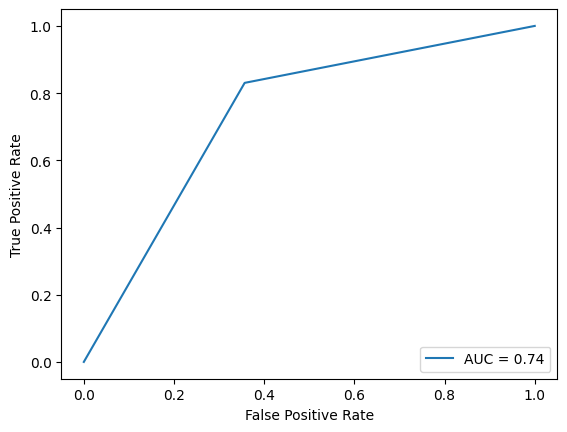

In [27]:
fpr, tpr, thresholds = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

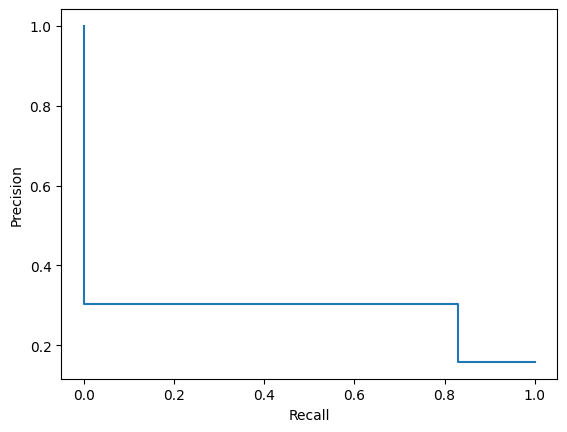

In [28]:
precision, recall, thresh_holds = precision_recall_curve(test_target, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

# Using SGD Classification
### Even without any class weights did a good job actually in TPs!

In [29]:
clf3 = SGDClassifier(random_state = 0, max_iter = 50000).fit(train_features, train_target)
clf3.score(test_features, test_target)

0.839142091152815

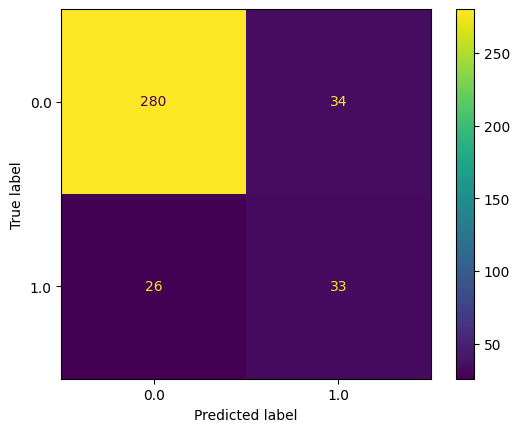

In [30]:
pred = clf3.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

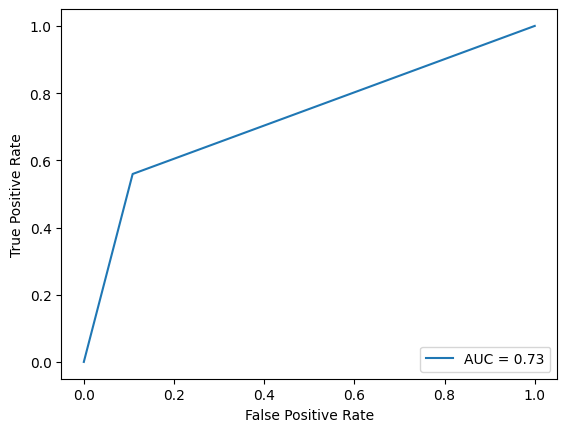

In [31]:
fpr, tpr, thresholds = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

## With class weights
### 6 seemed to give the best AUC under ROC  in this algorithm but not much improvement is observed

In [32]:
clf3_0 = SGDClassifier(random_state= 0, max_iter = 50000, class_weight={0:1, 1:6})
clf3_0.fit(train_features, train_target)
clf3_0.score(test_features, test_target)

0.7935656836461126

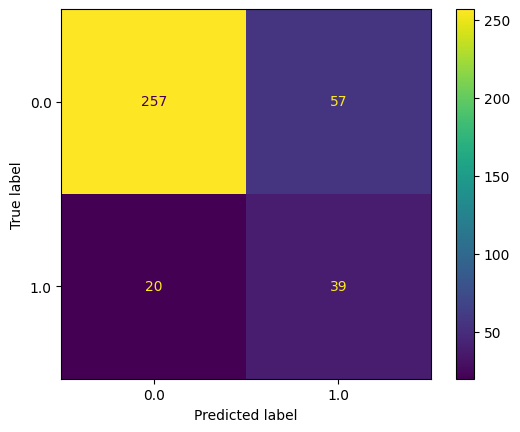

In [33]:
pred = clf3_0.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

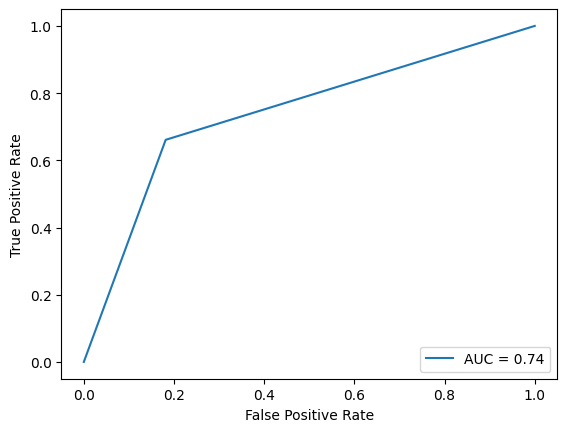

In [34]:
fpr, tpr, thresholds = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

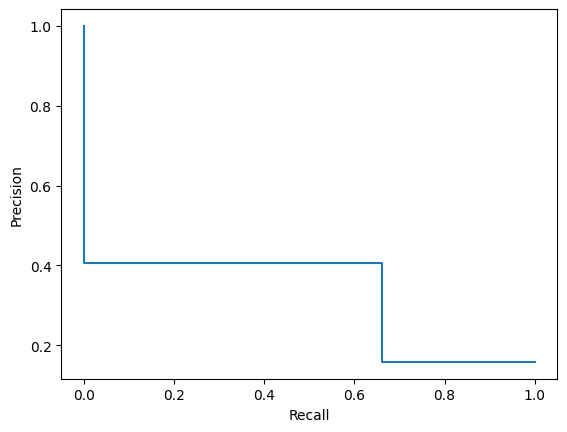

In [35]:
precision, recall, thresh_holds = precision_recall_curve(test_target, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

# Using Support Vector Machine
## it performed really similar to Ridge classification without class weights

In [36]:
svm = SVC(kernel = 'poly')
svm.fit(train_features, train_target)
svm.score(test_features, test_target)

0.8418230563002681

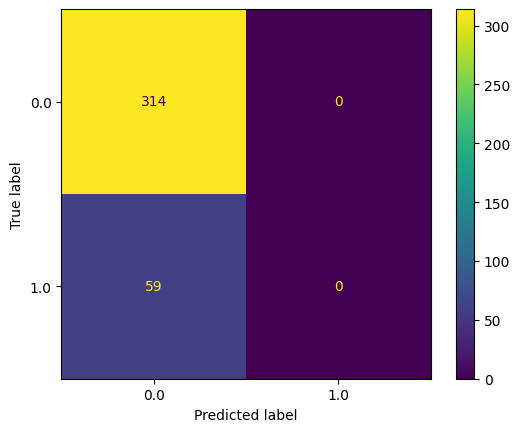

In [37]:
pred = svm.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Best model till now
## Using Class weights
### poly attribute works with another attribute degree, that is degree of the classifier hyperplane. It is really amazing to see that even the data is 34-D,  a  25-D hyperplane gives the best AUC under ROC.
### also in class weights, 6.2 weight to class 1 gave best results

In [38]:
svm_1 = SVC( kernel = 'poly', degree = 25, class_weight = {0:1, 1:6.2})
svm_1.fit(train_features, train_target)
svm_1.score(test_features, test_target)

0.8176943699731903

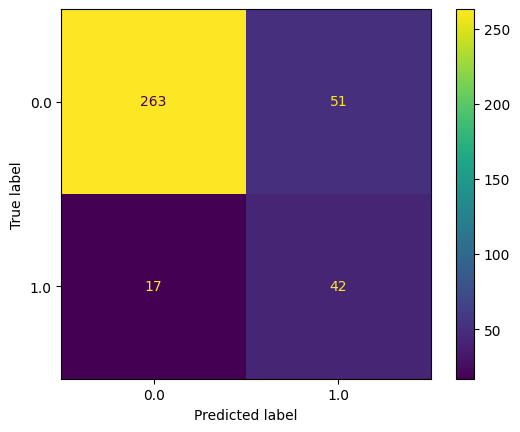

In [39]:
pred = svm_1.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

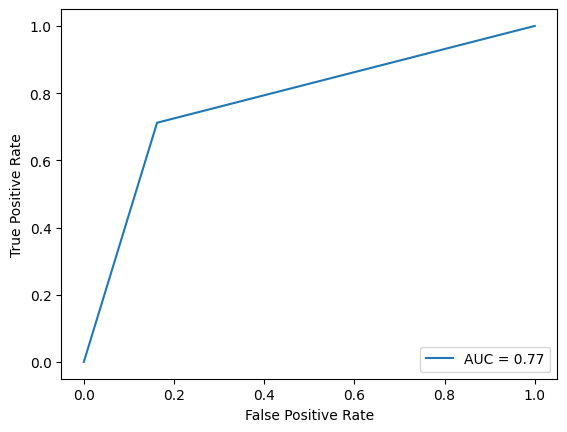

In [40]:
fpr, tpr, thresholds = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

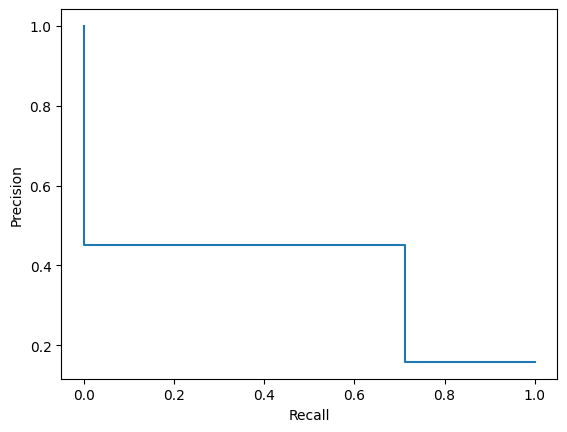

In [41]:
precision, recall, thresh_holds = precision_recall_curve(test_target, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

# Using Naive Bayes

In [42]:
nb_0 = GaussianNB().fit(train_features, train_target)
nb_0.score(test_features, test_target)

0.7908847184986595

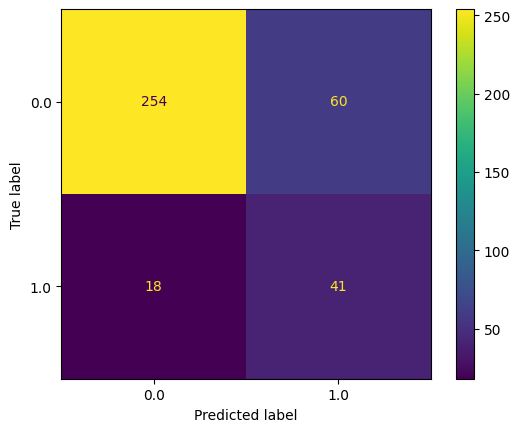

In [43]:
pred = nb_0.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

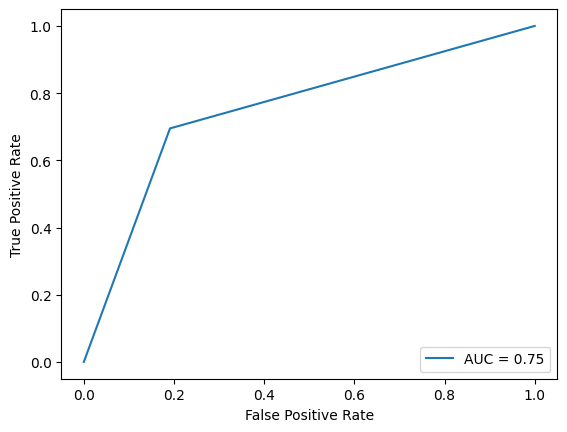

In [44]:
fpr, tpr, thresholds = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

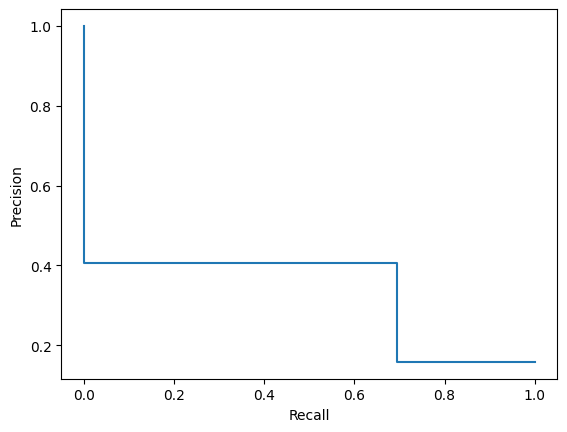

In [45]:
precision, recall, thresh_holds = precision_recall_curve(test_target, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

# using decision trees


In [46]:
dt_0 = DecisionTreeClassifier()
dt_0.fit(train_features, train_target)
dt_0.score(test_features, test_target)

0.7908847184986595

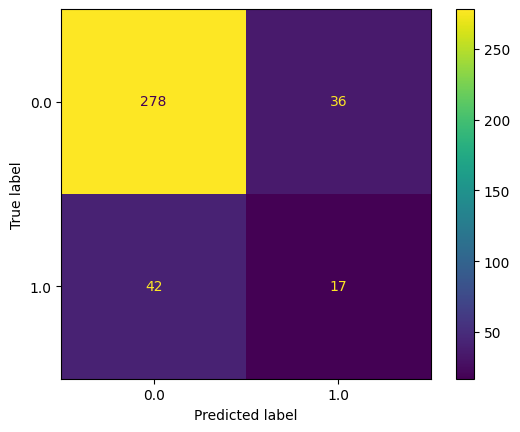

In [47]:
pred = dt_0.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [48]:
dt_1 = DecisionTreeClassifier(class_weight = 'balanced')
dt_1.fit(train_features, train_target)
dt_1.score(test_features, test_target)

0.8337801608579088

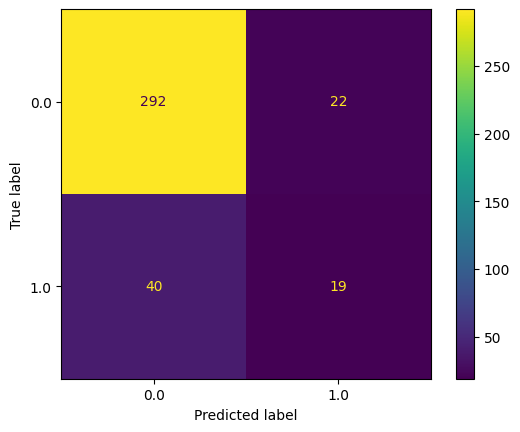

In [49]:
pred = dt_1.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

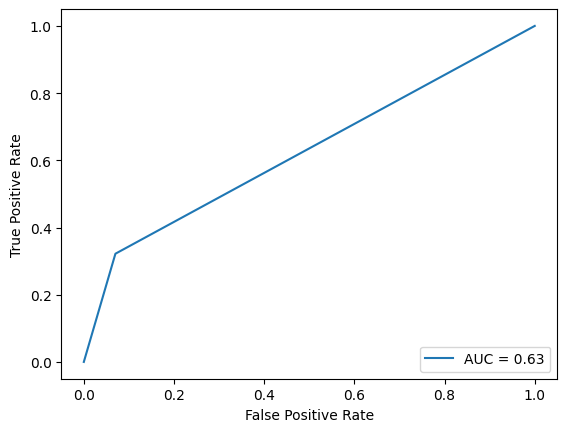

In [50]:
fpr, tpr, thresholds = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

# Using ensemble methods

In [51]:
AdB_0 = AdaBoostClassifier()
AdB_0.fit(train_features, train_target)
AdB_0.score(test_features, test_target)

0.871313672922252

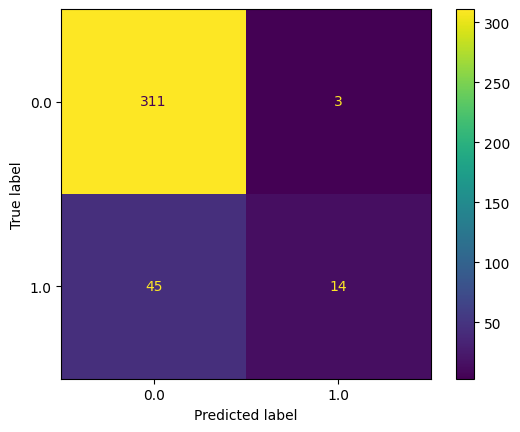

In [52]:
pred = AdB_0.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# in the docs it is written that there is a trade off in n_estimators and learning rate in adaboost ypu should study this aspect

# learning rate here increses the contribution of each classifier

# n estimators means number of estimators at which boosting is terminated
AdB_1 = AdaBoostClassifier(n_estimators = 1000000, learning_rate = 3)
AdB_1.fit(train_features, train_target)
AdB_1.score(test_features, test_target)

In [ ]:
pred = AdB_1.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
GdB_0 = GradientBoostingClassifier(max_depth = 5)
GdB_0.fit(train_features, train_target)
GdB_0.score(test_features, test_target)

In [ ]:
pred = GdB_0.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# in gradient boosting learning rate means decresing the contribution of eac tree bylearningrate 
# n estimaters means number of boosting stges to perform
GdB_1 = GradientBoostingClassifier(max_depth = 5, learning_rate = 1.5)
GdB_1.fit(train_features, train_target)
GdB_1.score(test_features, test_target)

In [ ]:
pred = GdB_1.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
Rf_0 = RandomForestClassifier()
Rf_0.fit(train_features, train_target)
Rf_0.score(test_features, test_target)

In [ ]:
pred = Rf_0.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# n estimator means number of trees
Rf_1 = RandomForestClassifier(n_estimators = 1000, class_weight={0:1, 1:10})
Rf_1.fit(train_features, train_target)
Rf_1.score(test_features, test_target)

In [ ]:
pred = Rf_1.predict(test_features)
pred
cm = confusion_matrix(test_target, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()